In [33]:
from tensorflow import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler


# Eda

In [2]:
df = pd.read_csv('../data/Student_performance_data _.csv')

In [3]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [5]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [6]:
y = df['GradeClass']
X = df.drop('GradeClass',axis=1)

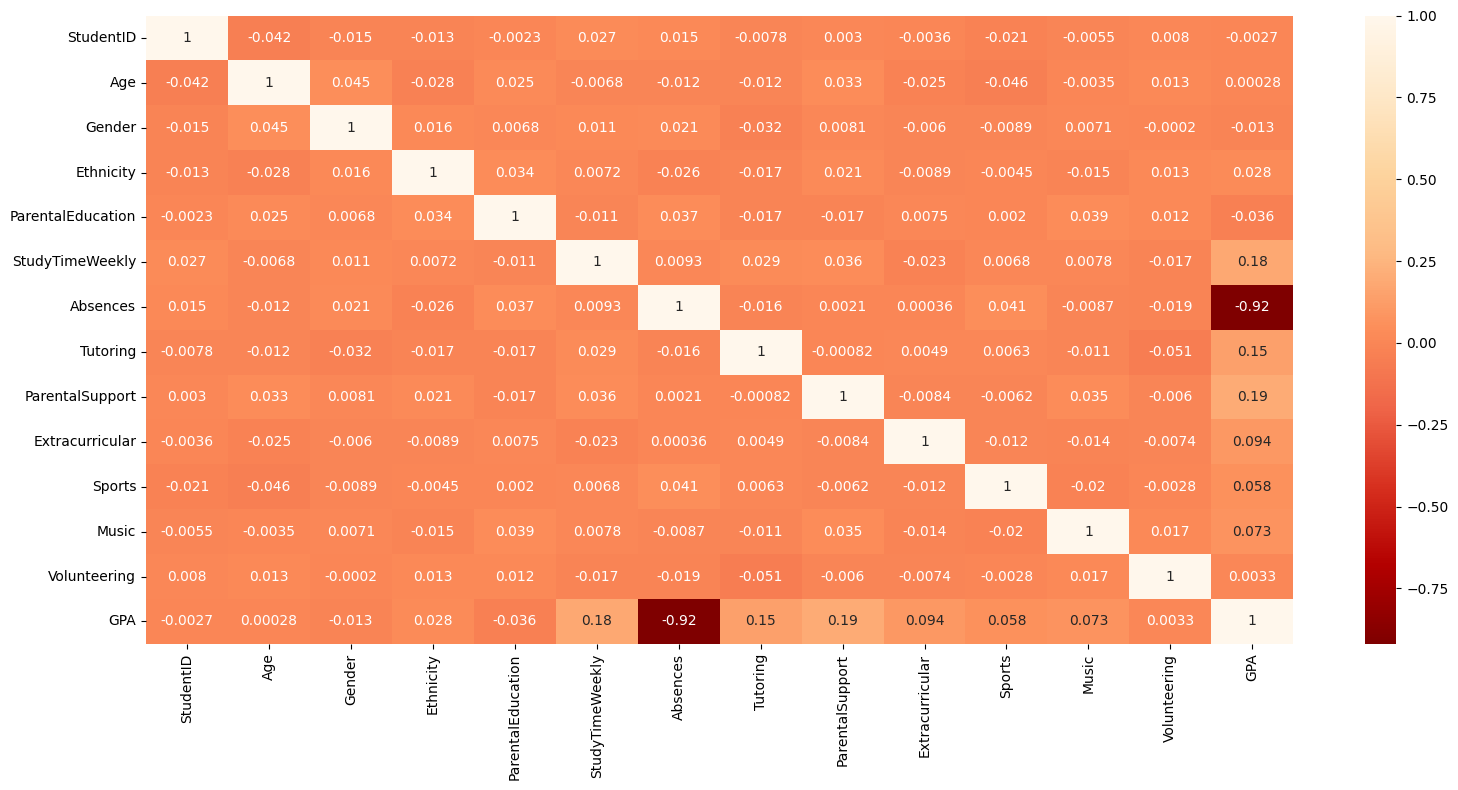

In [46]:
_, ax = plt.subplots(figsize=(16,8), tight_layout=True)
sns.heatmap(X.corr(),annot=True, cmap='OrRd_r', ax=ax)
plt.show()

/tmp/ipykernel_4625/3197749705.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X.hist(ax=ax)


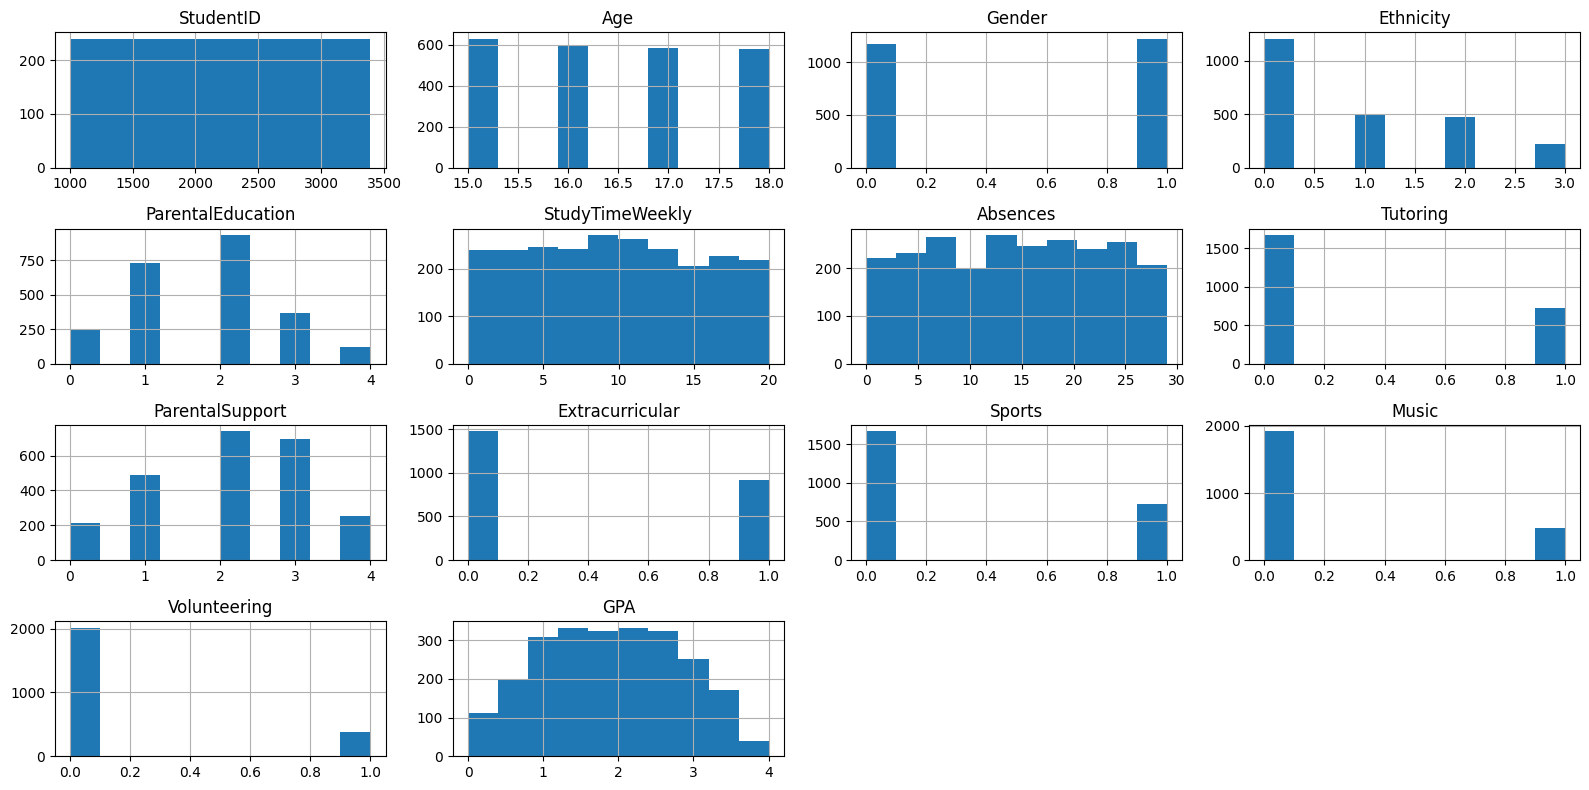

In [47]:
_, ax = plt.subplots(figsize=(16,8), tight_layout = True)
X.hist(ax=ax)
plt.show()

In [44]:
X.shape

(2392, 14)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, stratify=y)

In [147]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

<Axes: xlabel='GradeClass', ylabel='Count'>

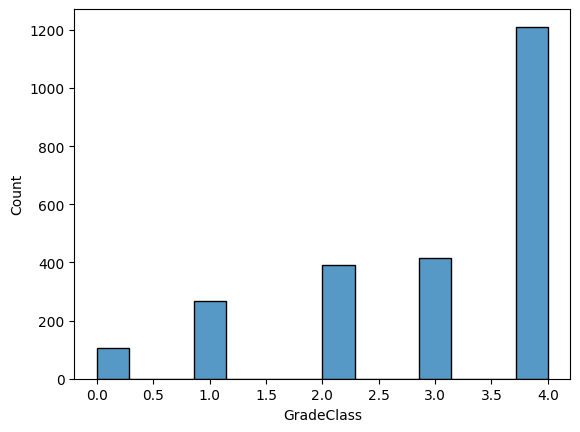

In [148]:
sns.histplot(y)

In [149]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(14,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
]
)

In [150]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 5)              │            45 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,189 (4.64 KB)

 Trainable params: 1,189 (4.64 KB)

 Non-trainable params: 0 (0.00 B)

In [172]:
history = model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9418 - loss: 0.1588
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9453 - loss: 0.1602
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9462 - loss: 0.1493
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9467 - loss: 0.1662
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9502 - loss: 0.1421
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9500 - loss: 0.1486
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9508 - loss: 0.1489
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9563 - loss: 0.1408
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9555 - loss: 0.1434
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9551 - loss: 0.1432
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9603 - loss: 0.1374
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9522 - lo

<Axes: >

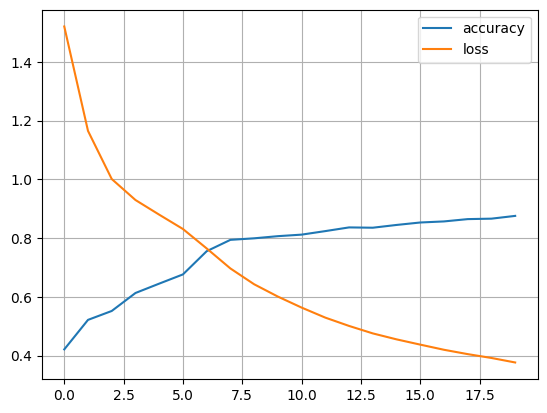

In [152]:
pd.DataFrame(history.history).plot(grid=True)

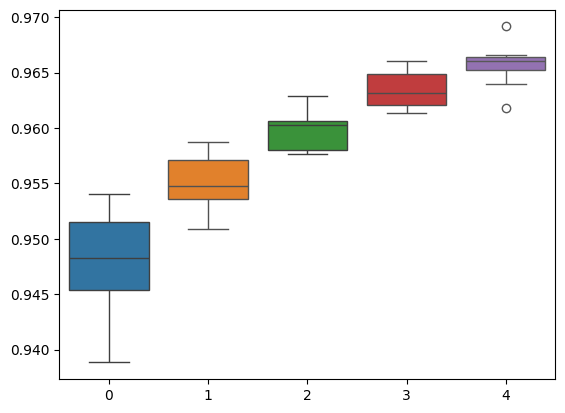

In [179]:
for i in range(5):
    sns.boxplot(x=(i+), y=history.history['accuracy'][(i)*10:(i+1)*10])

In [153]:
loss, accuracy = model.evaluate(X_train, y_train)
print('Pérdida en el conjunto de prueba:', loss)
print('Precisión en el conjunto de pruba:', accuracy)

loss, accuracy = model.evaluate(X_test, y_test)
print('Pérdida en el conjunto de prueba:', loss)
print('Precisión en el conjunto de pruba:', accuracy)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.1719 - loss: 9.8135
Pérdida en el conjunto de prueba: 9.845109939575195
Precisión en el conjunto de pruba: 0.1730266660451889
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1888 - loss: 9.5545 
Pérdida en el conjunto de prueba: 9.95477294921875
Precisión en el conjunto de pruba: 0.17327766120433807


In [154]:
y_pred = model.predict(X_test_scaled)
y_pred = y_pred.argmax(axis=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


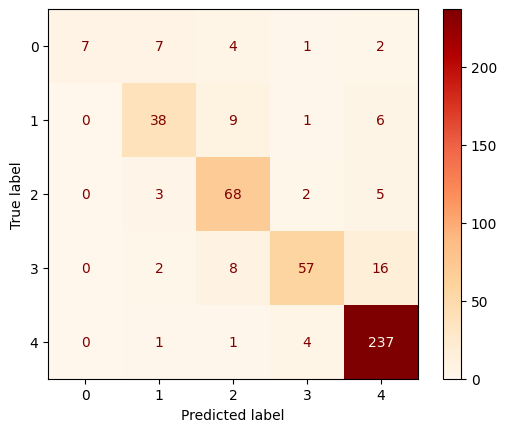

In [155]:
cfm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cfm).plot(cmap='OrRd')

In [156]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.33      0.50        21
         1.0       0.75      0.70      0.72        54
         2.0       0.76      0.87      0.81        78
         3.0       0.88      0.69      0.77        83
         4.0       0.89      0.98      0.93       243

    accuracy                           0.85       479
   macro avg       0.85      0.71      0.75       479
weighted avg       0.85      0.85      0.84       479

